<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- FALAR SOBRE O **CRISP-DM** + PAPER + GRÁFICO/IMAGEM + INDEX + EDA
- **ABSTRACT**: 200 to 300 words. What is the context? What are your goals? What did you do? What were your main results, and what conclusions did you draw from them?
- Group Member **CONTRIBUTIONS**
- model assessment strategy that allows you to create and compare different candidate models to identify the most generalizable one. 
- best (or set of best) model(s) -> explore ways to improve their performance (e.g. hyperparameter tuning or pre-processing/feature selection adjustments)

<br><br>
- Será que interessa a data? database from 2020
- Procurar a real base de dados
</div>

# <span style="color: #ffffff;">1 | Identifying Business Needs</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>1 | Identifying Business Needs</b></span>
    </h1>
</div>
<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Overview and main goals of the project
- Description of the overall process and identification of model assessment approach adopted in the work (CV, LOO, Holdout, etc...
</div>

<br>

**Cars 4 You** is an online car resale company that buys vehicles from multiple brands and resells them for profit. Currently, cars must be inspected by mechanics before purchase, but growing demand has created long waiting lists. This delays the process and drives potential customers to competitors. The company’s main business need is to speed up car evaluations by developing a **predictive model that can estimate car prices directly from user-provided information**, without requiring a mechanic’s inspection. <br>
We have available the following attributes:

<div style="display: flex; justify-content: center; margin-top: 20px;">


|       | **Attribute**                               | **Description**                                                                  |
|-------|--------------------------------------------|---------------------------------------------------------------------------------|
| **0** | `carID`                               | An attribute that contains an identifier for each car                                                     |
| **1** | `Brand`                                 | The car’s main brand (e.g. Ford, Toyota)                                                               |
| **2** | `model`                              | The car model                                  |
| **3** | `year` | The year of Registration of the Car                   |
| **4** | `mileage`               |     The total reported distance travelled by the car (in miles)               |  
| **5** | `tax`                        | The amount of road tax (in £) that, in 2020, was applicable to the car in question                            |
| **6** | `fuelType`                         | Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)                             |
| **7** | `mpg`                                   | Average Miles per Gallon                                      |
| **8** | `engineSize`                                    | Size of Engine in liters (Cubic Decimeters)                                       |
| **9** | `paintQuality%`                                    | The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation)                                       |
| **10**| `previousOwners`                                | Number of previous registered owners of the vehicle                                   |
| **11**| `hasDamage`     | Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not                 |
| **12**| `price`                        | The car’s price when purchased by Cars 4 You (in £)                           |


</div  >

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px;">
</div>

In [ ]:
import pandas as pd
import numpy as np

# For the split
from sklearn.model_selection import train_test_split

# To deal with inconsistencies
from rapidfuzz import process
from datetime import datetime

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from wordcloud import WordCloud

# For encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

# Disable FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of the visualization
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

In [2]:
### APAGAR ###
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install rapidfuzz
#!pip install wordcloud

In [3]:
# Load both training and testing datasets
car_eval = pd.read_csv('../project_data/train.csv')
X_test = pd.read_csv('../project_data/test.csv')

# <span style="color: #ffffff;">2 |  Data Exploration and Preprocessing</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>2 | Data Exploration and Preprocessing</b></span>
    </h1>
</div>
<br>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Description of data received -> key insights
 - Steps taken to clean and prepare the data based on exploration
<br><br><br>
 - Check data contents, provide descriptive statistics and check for inconsistencies in the data.
 - Explore data visually and extract relevant insights. Explain your rationale and findings. Do not forget to analyse multivariate relationships.
 - Are there any missing values? Take action to handle them.
 - Check the dataset for outliers and pre-process them. Justify your decisions.
 - Deal with categorical variables.
 - Review current features and create extra features if needed. Explain your steps.
 - Perform data scaling. Explain the reasoning behind your choices.
 <br><br>

 - Define and implement a clear and unambiguous strategy for **feature selection**. Use the methods discussed in the course. Present and justify your final selection.

</div>


## <span style="color: #ffffff;">2.1 |  Data Content</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.1 | Data Content</b></span>
    </h1>
</div>

In [4]:
car_eval.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.00,22290,Semi-Auto,28421.00,Petrol,NaN,11.42,2.00,63.00,4.00,0.00
1,53000,Toyota,Yaris,2019.00,13790,Manual,4589.00,Petrol,145.00,47.90,1.50,50.00,1.00,0.00
2,6366,Audi,Q2,2019.00,24990,Semi-Auto,3624.00,Petrol,145.00,40.90,1.50,56.00,4.00,0.00
3,29021,Ford,FIESTA,2018.00,12500,anual,9102.00,Petrol,145.00,65.70,1.00,50.00,-2.34,0.00
4,10062,BMW,2 Series,2019.00,22995,Manual,1000.00,Petrol,145.00,42.80,1.50,97.00,3.00,0.00


In [5]:
X_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.88,Automatic,30700.00,petrol,205.00,41.50,1.60,61.00,3.00,0.00
1,106581,VW,Tiguan,2017.00,Semi-Auto,-48190.66,Petrol,150.00,38.20,2.00,60.00,2.00,0.00
2,80886,BMW,2 Series,2016.00,Automatic,36792.00,Petrol,125.00,51.40,1.50,94.00,2.00,0.00
3,100174,Opel,Grandland X,2019.00,Manual,5533.00,Petrol,145.00,44.10,1.20,77.00,1.00,0.00
4,81376,BMW,1 Series,2019.00,Semi-Auto,9058.00,Diesel,150.00,51.40,2.00,45.00,4.00,0.00


It is useful to use `.head()` function to get an overview of the variables and their contents, as well as a first impression of the preprocessing steps that will be required.

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

By observing just a few rows, we can already identify both categorical and numerical variables. Since categorical variables are present, we know that some type of encoding will be required before using them in the model. Some of the numerical variables (like `year` and `previousOwners`) should not be treated as continuous . It is also noticeable that there are missing values, at least in the variable `tax`. Additionally, there are some spelling errors and inconsistencies in text formatting, such as differences in lowercase and uppercase (ex: `transmission` includes both "Manual" and "anual").
</div>


In [6]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


It is also useful to use the `.info()` function to check the data types of each variable and identify the presence of missing values, which helps to plan the necessary preprocessing steps.
<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

The train and test datasets contain the same variables, except for the target variable `price`, as expected. The data types are consistent across both datasets, however, some issues are present.

The training set contains 75,973 records and all variables have missing values except for the identifier `carID` and the target variable `price`.
The test set contains 32,567 records and also shows missing values in all variables except for the identifier `carID`.

Moreover, it can be noted that the variables `year` and `previousOwners` should indeed be numeric, but of integer type (int64) rather than continuous (float64). The variable `hasDamage` should be boolean, as a car either has damage or it does not. Finally, `carID` should be categorical, but since it is a unique identifier and will not be used in the model, there is no need to modify its data type.

</div>


In [8]:
#Check for duplicates
print(f"Total duplicates: {car_eval.duplicated().sum()}")
#Check for duplicates without the carID column
print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
#Check for duplicates without the price column
print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

# Repeat for the test set
print(f"Total duplicates in test set: {X_test.duplicated().sum()}")
print(f"Duplicates without carID in test set: {X_test.drop(columns=['carID']).duplicated().sum()}")

Total duplicates: 0
Duplicates without carID: 4
Duplicates without price and carID: 11
Total duplicates in test set: 0
Duplicates without carID in test set: 0


In [9]:
### APAGAR MAYBE ###

# # Duplicates without carID
# dup_no_id = car_eval[car_eval.drop(columns=['carID']).duplicated(keep=False)]
# print("\nDuplicates without carID:")
# display(dup_no_id.sort_values(by=dup_no_id.columns.tolist()))

# # Duplicates without price and carID
# dup_no_id_price = car_eval[car_eval.drop(columns=['price', 'carID']).duplicated(keep=False)]
# print("\nDuplicates without price and carID:")
# display(dup_no_id_price.sort_values(by=dup_no_id_price.columns.tolist()))

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

We can see that although there are no duplicates when considering all columns, there are 4 duplicates in the training set when the `carID` column is excluded. We consider these to be true duplicates and therefore remove them.
Additionally, there are 11 duplicates when excluding both `carID` and `price`. Since `carID` is only an identifier and not an input variable, having identical inputs with different target values would confuse the model; there would be no apparent reason for predicting different prices. This increases noise and reduces the model’s generalization ability, so these duplicates are also removed.
</div>

In [10]:
# Remove duplicates without considering carID and then without considering price and carID
car_eval = car_eval.drop_duplicates(subset=car_eval.columns.difference(['carID']))
car_eval = car_eval.drop_duplicates(subset=car_eval.columns.difference(['carID', 'price']))

print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

Duplicates without carID: 0
Duplicates without price and carID: 0


In [11]:
### APAGAR ###
# # duplicates that have all the same values in mileage,tax, mpg, engineSize, paintQuality% and previousOwners
# duplicates_idx = car_eval.duplicated(subset=['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'],keep=False)
# pd.set_option('display.max_rows', None)
# display(car_eval[duplicates_idx])


#  528	59584	OPEL	Corsa	2019.00	9990	Manual	100.00	"NaN"    145.00	43.50	1.40	44.00	4.00	0.00
# 1658	60221	Opel	Corsa	2019.00	10490	Manual	100.00	"Petrol" 145.00	43.50	1.40	44.00	4.00	0.00

# 14737	21475	FORD	Focus	2016.00	9000	 "NaN"	-42650.45	Petrol	NaN	NaN	1.00	93.00	1.00	0.00
# 61272	29178	Ford	Focus	2018.00	13500	"Manual"-42650.45	Petrol	NaN	NaN	1.00	93.00	1.00	0.00

# 42475	39818	Mercedes	"A Class"	2020.00	25879	Semi-Auto	1000.00	Petrol	145.00	53.30	1.30	73.00	2.00	0.00
# 53457	38297	Mercedes	"NaN"       2020.00	26519	Semi-Auto	1000.00	Petrol	145.00	53.30	1.30	73.00	2.00	0.00
# -----------------------------
# Têm preços diferentes mas tudo é igual
# 50606	59684	Opel	Mokka	2016.00	10500	Manual	NaN	Petrol	160.00	44.80	1.40	90.00	2.00	0.00
# 51598	60068	opel	Mokka	2016.00	9010	Manua	NaN	Petrol	160.00	44.80	1.40	90.00	2.00	0.00

# 19824	71941	VW	Golf	2019.00	28800	Semi-Auto	100.00	Petrol	150.00	32.80	2.00	73.00	4.00	0.00
# 75837	66842	VW	Golf	2019.00	29000	Semi-Auto	100.00	Petrol	150.00	32.80	2.00	73.00	4.00	0.00

# 18608	58441	Opel	Astra	2017.00	9495	Manual	24160.00	Petrol	125.00	51.40	1.40	75.00	4.00	0.00
# 32773	60327	Opel	Astra	2017.00	10691	Manual	24160.00	Petrol	125.00	51.40	1.40	75.00	4.00	0.00

# 17258	64121	Opel	Corsa	2019.00	10990	Manual	100.00	Petrol	145.00	43.50	1.40	98.00	3.00	0.00
# 63884	60076	Opel	Corsa	2019.00	9990	Manual	100.00	Petrol	145.00	43.50	1.40	98.00	3.00	0.00

# 1117	61662	Opel	Corsa	2019.00	10990	Manual	100.00	Petrol	145.00	43.50	1.40	44.00	0.00	0.00
# 71388	55913	Opel	Corsa	2019.00	9990	Manual	100.00	Petrol	145.00	43.50	1.40	44.00	0.00	0.00

# 1016	31670	Hyundai	I10	2018.00	7495	Manual	15207.00	Petrol	145.00	60.10	1.00	86.00	1.00	0.00
# 42217	34281	Hyundai	I10	2018.00	7895	Manual	15207.00	Petrol	145.00	60.10	1.00	86.00	1.00	0.00

# 2302	58986	Opel	Astra	2020.00	16350	Manual	10.00	Petrol	145.00	54.30	1.20	37.00	3.00	0.00
# 17851	58117	Opel	Astra	2020.00	15295	Manual	10.00	Petrol	145.00	54.30	1.20	37.00	3.00	0.00

# 10091	57126	Opel	CORSA	2019.00	15600	Manual	NaN	Petrol	145.00	43.50	1.40	69.00	0.00	0.00
# 14684	59770	OPEL	Corsa	2019.00	8995	anual	NaN	petrol	145.00	43.50	1.40	69.00	0.00	0.00

# 12724	62122	NaN	    Astra	2020.00	14990	Manual	100.00	Petrol	145.00	54.30	1.20	62.00	1.00	0.00
# 19687	63977	Opel	Astra	2020.00	15690	Manua	100.00	Petrol	145.00	54.30	1.20	62.00	1.00	0.00

# 17240	36582	Mercedes	A Class	2020.00	25879	Semi-Auto	1000.00	petrol	145.00	53.30	1.30	96.00	3.00	0.00
# 33417	43174	Mercede	    A Class	2020.00	25559	Semi-Aut	1000.00	Petrol	145.00	53.30	1.30	96.00	3.00	0.00
# -----------------------------
# Tudo igual portanto depois de imputation temos de retirar antes de ir para missings juntando price
# 56102	7782	BMW	     NaN    	NaN	21898	Manual	4100.00	Petrol	150.00	41.50	1.50	40.00	2.00	0.00
# 69382	11560	BMW	1 SERIES	2019.00	21898	Manual	4100.00	Petrol	150.00	41.50	1.50	40.00	2.00	NaN

# 3127	59143	 pel	Astra	2019.00	14775	Manual	10.00	Diesel	145.00	58.90	1.60	76.00	4.00	0.00
# 5614	58836	Opel	Astra	2019.00	14775	Manual	10.00	Diesel	145.00	58.90	1.60	76.00	4.00	0.00

# 42120	28593	Ford	Focus	2019.00	19500	Manual	3000.00	Diese	NaN	NaN	1.50	91.00	4.00	0.00
# 45996	21775	Ford	Focus	2019.00	19500	Manual	3000.00	Diesel	NaN	NaN	1.50	91.00	4.00	0.00

# 10579	42198	Mercedes	C Class	2014.00	11750	Semi-Auto	77043.00	Diesel	NaN	NaN	2.10	47.00	2.00	0.00
# 41122	37638	 ercedes	C Class	2014.00	11750	Semi-Auto	77043.00	Diesel	NaN	NaN	2.10	47.00	2.00	0.00

# 14181	59616	Opel	Astra	2020.00	15990	Manual	100.00	Petrol	145.00	54.30	1.20	46.00	1.00	0.00
# 61168	58733	Opel	Astra	2020.00	15820	Manual	100.00	Petrol	145.00	54.30	1.20	46.00	1.00	0.00 (nem sei como não deu duplicate)


In [12]:
# Set "carID" as index since it is a unique identifier as confirmed by the .info() output
car_eval.set_index('carID', inplace=True)
X_test.set_index('carID', inplace=True)

## <span style="color: #ffffff;">2.2 |  Descriptive Statistics</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.2 | Descriptive Statistics</b></span>
    </h1>
</div>

In [13]:
# Get numerical columns
numeric_cols = car_eval.select_dtypes(include='number')

# Describe
numeric_desc = numeric_cols.describe().T

# Add skewness and kurtosis
numeric_desc['skew'] = numeric_cols.skew()
numeric_desc['kurtosis'] = numeric_cols.kurtosis()
numeric_desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
year,74471.00,2017.10,2.21,1970.00,2016.00,2017.00,2019.00,2024.12,-1.85,11.80
price,75962.00,16882.26,9737.28,450.00,10200.00,14699.00,20950.00,159999.00,2.28,12.00
mileage,74500.00,23006.39,22130.27,-58540.57,7426.00,17303.00,32432.25,323000.00,1.55,5.23
tax,68060.00,120.33,65.52,-91.12,125.00,145.00,145.00,580.00,0.05,3.56
mpg,68038.00,55.15,16.50,-43.42,46.30,54.30,62.80,470.80,7.30,158.66
engineSize,74446.00,1.66,0.57,-0.10,1.20,1.60,2.00,6.60,1.23,4.44
paintQuality%,74438.00,64.59,21.02,1.64,47.00,65.00,82.00,125.59,-0.01,-0.77
previousOwners,74412.00,1.99,1.47,-2.35,1.00,2.00,3.00,6.26,-0.00,-0.85
hasDamage,74414.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

In addition to the insights drawn so far from the numerical variables in the training dataset, we can further highlight:
- **`year`**: has a distribution centered around 2017, indicating that most cars in the dataset are relatively recent (from 2016 onwards). The minimum value of 1970 reveals a few much older vehicles. The negative skewness (-1.85) confirms a concentration of newer models, with a long left tail representing these rare older cars. The high kurtosis (11.8) further suggests a narrow and peaked distribution with extreme values, reinforcing that while some cars are old, the vast majority belong to modern years.

- **`price`**: has a mean of around 16,882 with considerable dispersion (std ≈ 9,737). About 75% of cars cost up to roughly 20,950, while the maximum price reaches nearly 160,000, indicating the presence of some luxury vehicles. The positive skew (2.28) shows a strongly right-skewed distribution, with most cars priced lower but a few extremely high values. The high kurtosis (12.0) further highlights a long-tailed distribution with notable outliers at the upper end.

- **`mileage`**: shows an average of around 23,000 miles with considerable dispersion (standard deviation ≈ 22,130), reflecting the diversity in vehicle usage. The quartiles indicate that 50% of cars have between approximately 7,400 and 32,400 miles, typical of relatively recent vehicles with regular use. The positive skewness (1.55) shows that most vehicles have low to moderate mileage, while a few have very high values. The kurtosis (5.23) confirms the presence of some outliers. The negative minimum value (-58,540) is unrealistic and will be corrected, although it does not substantially alter the overall pattern of the variable.
<!-- affecting the mean, standard deviation, and the lower tail. Despite this, the positive skew (1.56) indicates that most cars have moderate mileage, with a few high-mileage outliers -->

- **`tax`**: has an average of around £120, with values mostly concentrated between £125 and £145 (25th and 75th percentiles), suggesting that most cars fall within similar tax bands, typical of low- to mid-emission vehicles. The dispersion is moderate (std ≈ 66), and the near-zero skewness (0.05) indicates an approximately symmetric distribution, further supported by the kurtosis (3.56) close to normality. The negative value (-91.12) is logically impossible and slightly affects the symmetry of the distribution. We will treat or remove it to prevent bias in further analyses and predictive models.

- **`mpg`**: has an average of about 55 mpg, with most values ranging between 46 and 63 mpg, reflecting a dataset dominated by vehicles with fuel efficiency typical of modern cars. However, the strong right skewness (7.30) and extremely high kurtosis (158.66) indicate the presence of severe outliers that should be carefully examined. The negative minimum (-43.42) is physically impossible and should be removed. If not properly treated, this variable could distort its relationship with `price` in the final model and harm predictive performance.

- **`engineSize`**: presents a realistic distribution, with an average of 1.66L and most vehicles between 1.2L and 2.0L. The positive skewness (1.23) and slightly high kurtosis (4.44) indicate a few cars with larger engines, up to 6.6L. The negative minimum value (-0.1)  is technically impossible and may slightly influence the positive skew.

- **`paintQuality%`**: presents a balanced distribution (skew ≈ 0, kurtosis ≈ -0.8), suggesting values are spread almost symmetrically around the mean (64.6). Most cars have paint quality between 47% and 82%, with few extreme values. This variable seems approximately normal, with moderate dispersion (std = 21.0). The maximum value (125.59%) is unrealistic for a percentage scale.

- **`previousOwners`**: displays a symmetric distribution (skew ≈ 0), centered around 2 previous owners on average, with most cars having between 1 and 3 owners. Kurtosis is slightly negative (-0.85), indicating a flatter-than-normal shape (less concentration around the mean). The negative minimum value (-2.35) is clearly invalid, and after removing these negative entries, the distribution is expected to approximate a normal shape.

- **`hasDamage`**: this analysis is not strictly appropriate, since the variable is binary (though its type has not yet been converted). Nonetheless, we can see no variation, all values are 0. This makes the variable meaningless in its current form, as it should be boolean (0 = no damage, 1 = damaged). Since the “1” category never appears, the feature provides no analytical value. It could be removed from the model, although we will further investigate its origin.

</div>


In [14]:
# Get numerical columns
numeric_cols_t = X_test.select_dtypes(include='number')

# Describe
numeric_desc_t = numeric_cols_t.describe().T

# Add skewness and kurtosis
numeric_desc_t['skew'] = numeric_cols_t.skew()
numeric_desc_t['kurtosis'] = numeric_cols_t.kurtosis()
numeric_desc_t

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
year,31914.00,2017.10,2.21,1991.00,2016.00,2017.00,2019.00,2024.12,-1.61,6.81
mileage,31878.00,22952.66,22132.76,-58540.57,7298.25,17225.50,32500.00,279000.00,1.49,4.46
tax,29259.00,120.57,65.56,-91.12,125.00,145.00,145.00,580.00,0.08,3.74
mpg,29279.00,55.21,17.64,-43.42,46.30,54.30,62.80,470.80,8.76,186.44
engineSize,31939.00,1.67,0.57,-0.10,1.20,1.60,2.00,6.60,1.18,3.93
paintQuality%,31942.00,64.45,21.14,1.64,47.00,65.00,82.00,125.59,-0.01,-0.74
previousOwners,31970.00,2.01,1.47,-2.35,1.00,2.00,3.00,6.26,-0.00,-0.81
hasDamage,31970.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the test set in comparison with the previously analyzed training set:
- **`year`**: maintains almost the same distribution, with an identical mean and equal interquartile ranges, but with a higher minimum value (1991 vs. 1970), indicating the absence of the oldest vehicles in the test set. The lower skewness (-1.61 vs. -1.85) and kurtosis (6.81 vs. 11.8) suggest a slightly less concentrated distribution with fewer extreme values.

- **`mileage`**: shows values that are nearly identical, including the same impossible negative minimum, showing that the same type of measurement error persists. However, there is a slight reduction in skewness (1.49 vs. 1.55) and kurtosis (4.46 vs. 5.23), suggesting a somewhat more balanced distribution.

- **`tax`**: exhibits an almost identical distribution between the two datasets, again including the invalid negative value. Both the mean and quartiles are nearly the same, indicating structural consistency in the test set. Minor variations in skewness (0.08 vs. 0.05) and kurtosis (3.74 vs. 3.56) are not significant.

- **`mpg`**: although the central statistics remain identical, the test set shows greater dispersion (std 17.64 vs. 16.50), higher skewness (8.76 vs. 7.30), and even higher kurtosis (186.44 vs. 158.66), reflecting a stronger presence of extreme values. The negative values remain and must be corrected, as they significantly influence the distribution and may harm the performance of the price prediction model.

- **`engineSize`**: behaves almost identically to the training set, with similar mean and dispersion. The slight decrease in skewness (1.18 vs. 1.23) and kurtosis (3.93 vs. 4.44) indicates a marginally more homogeneous distribution in the test set.

- **`paintQuality%`**: shows very similar distributions across both datasets. The means (≈64.5) and quartiles remain practically unchanged, as do the shape measures (skewness and kurtosis near zero), demonstrating stability and good representativeness of this variable between training and testing.

- **`previousOwners`**: has nearly identical values, including the same impossible negative minimum (-2.35). The means (≈2) and quartiles match, and the distribution remains symmetric, confirming consistency across datasets, although the negative anomaly still needs correction. 

- **`hasDamage`**: continues to show no variation, containing only zeros in both datasets. The recommendation stands where its source should be reviewed, and its removal from the model should be considered.

</div>


In [15]:
# Get categorical columns
cat_cols = car_eval.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc = cat_cols.describe().T

# Add proportion of the most frequent category
cat_desc['top_freq_ratio'] = cat_desc['freq'] / cat_desc['count']

cat_desc

,count,unique,top,freq,top_freq_ratio
Brand,74441,72,Ford,14806,0.20
model,74445,735,Focus,6351,0.09
transmission,74440,40,Manual,38042,0.51
fuelType,74451,34,Petrol,37985,0.51


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

The categorical attributes in the training dataset also provide important insights:

- **`Brand`**: contains 72 distinct brands. The most frequent brand is `Ford`, representing 20%.

- **`model`**: shows a high level of variability (735 unique models). The most common model is the `Focus` (primarily associated with the Ford brand), accounting for 9% of all observations.

- **`transmission`**: includes 40 distinct categories, though the variable is clearly dominated by `Manual` vehicles, which make up about 51.1% of the dataset. This reflects typical market patterns, where manual transmission vehicles are still prevalent, particularly among mid-range and older models.

- **`fuelType`**: consists of 34 distinct fuel categories, with `Petrol` as the dominant type (≈51.0% of observations). This prevalence aligns with general automotive market trends, though the inclusion of other fuel types introduces potentially valuable variation for analysing price effects.

</div>

In [16]:
# Get categorical columns
cat_cols_t = X_test.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc_t = cat_cols_t.describe().T

# Add proportion of the most frequent category
cat_desc_t['top_freq_ratio'] = cat_desc_t['freq'] / cat_desc_t['count']

cat_desc_t

,count,unique,top,freq,top_freq_ratio
Brand,31918,64,Ford,6360,0.20
model,31917,593,Focus,2721,0.09
transmission,31944,38,Manual,16312,0.51
fuelType,31911,29,Petrol,16113,0.50


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the categorical variables in the test set in comparison with the previously analyzed training set:

- **`Brand`**: contains slightly fewer unique brands (64 vs. 72). However, `Ford` continues to dominate, representing 20% of the observations in both datasets.

- **`model`**: there is a noticeable reduction in the number of unique models (593 vs. 735) probably due to the smaller sample size of the test set. Despite this, `Focus` remains the most frequent model, accounting for 9% of all records.

- **`transmission`**: the most common transmission type is still `Manual`, appearing in just over half of the entries (≈51%). The number of unique categories is also very similar (38 vs. 40), implying that the test set preserves the main diversity of transmission types found in the training data.

- **`fuelType`**: `Petrol` remains the dominant fuel type (50% vs. 51%). The slight decrease in the number of unique fuel types (29 vs. 34) likely reflects the absence of some rare or less common categories in the test sample.
</div>

It is important to note that, as we have already observed and will further explore later, there are numerous spelling errors and text formatting inconsistencies within the categorical variables, which significantly affect the current analysis and our overall understanding of the data. The present examination, regarding the categorical variables,mainly serves as a reference point for comparison with the results obtained after addressing these inconsistencies.

## <span style="color: #ffffff;">2.3 | Explore Data Visualizations</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations</b></span>
    </h1>
</div>

In [17]:
# Exclude the column 'hasDamage' from the Numeric columns, and include it in Categorical columns
num = car_eval.select_dtypes(include='number').columns.drop('hasDamage')
cat = car_eval.select_dtypes(include='object').columns.union(pd.Index(['hasDamage']))


print(f'Numeric columns: {len(num)} {list(num)} \n')
print(f'Categorical columns: {len(cat)} {list(cat)}')

palette = ['#5C4212','#a92f02', '#a55b1bf9', '#b08972', '#e3a76c', '#e5c120','#f39c06','#f2e209']

Numeric columns: 8 ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'] 

Categorical columns: 5 ['Brand', 'fuelType', 'hasDamage', 'model', 'transmission']


In [40]:
def plot_box_hist(df, cols, title): 
    """
    Plot boxplots and histograms (with KDE) for a list of variables

    Args:
        df (pd.DataFrame): Input dataframe;
        cols (list): List of column names to plot.
    """
    
    # Calculate number of subplot rows 
    sp_rows = ceil(len(cols) / 2)
    
    # Create figure with double rows: one for boxplots, one for histograms
    fig, axes = plt.subplots(
        sp_rows * 2, 2,
        figsize=(14, sp_rows * 4.5),
        gridspec_kw={'height_ratios': [0.3, 0.85] * sp_rows},  # boxplots shorter, histograms taller
        tight_layout=False
    )
    
    # Ensure axes is a 2D array for consistent indexing
    axes = np.array(axes).reshape(sp_rows * 2, 2)

    # Loop through each feature to plot
    for idx, feat in enumerate(cols):
        row, col = (idx // 2) * 2, idx % 2 # Determine that variable's plot position
        ax_box, ax_hist = axes[row, col], axes[row + 1, col]

        # Boxplot
        sns.boxplot(x=df[feat], color=palette[-2], ax=ax_box, orient='h', width=0.58)
        
        # Remove axis labels
        ax_box.set_xlabel(None)
        ax_box.set_ylabel(None)
        # Remove top and right borders
        sns.despine(ax=ax_box, top=True, right=True)


        # Histogram
        sns.histplot(df[feat], bins=50, color=palette[-2], kde=True, stat='percent', alpha=0.6, ax=ax_hist)
            
        # Calculate and plot statistics
        stats = {
            'mean': df[feat].mean(),
            'median': df[feat].median(),
            'q1': df[feat].quantile(0.25),
            'q3': df[feat].quantile(0.75)
        }
        # Plot vertical lines for each statistic
        for stat_name, stat_val in stats.items():
            ax_hist.axvline(
                stat_val, color=palette[list(stats.keys()).index(stat_name)], linestyle='--',
                linewidth=1.5, alpha=0.8, label=f'{stat_name.capitalize()}: {stat_val:.1f}'
            )
        # Remove top and right borders
        ax_hist.legend(loc='best', fontsize=7)
        sns.despine(ax=ax_hist, top=True, right=True)

    # Remove any unused subplots
    for i in range(len(cols) * 2+1, sp_rows * 4):
            fig.delaxes(axes.flatten()[i])
        
    # Title
    plt.suptitle("Distribution of Numerical Car Features " + title, fontweight='bold', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


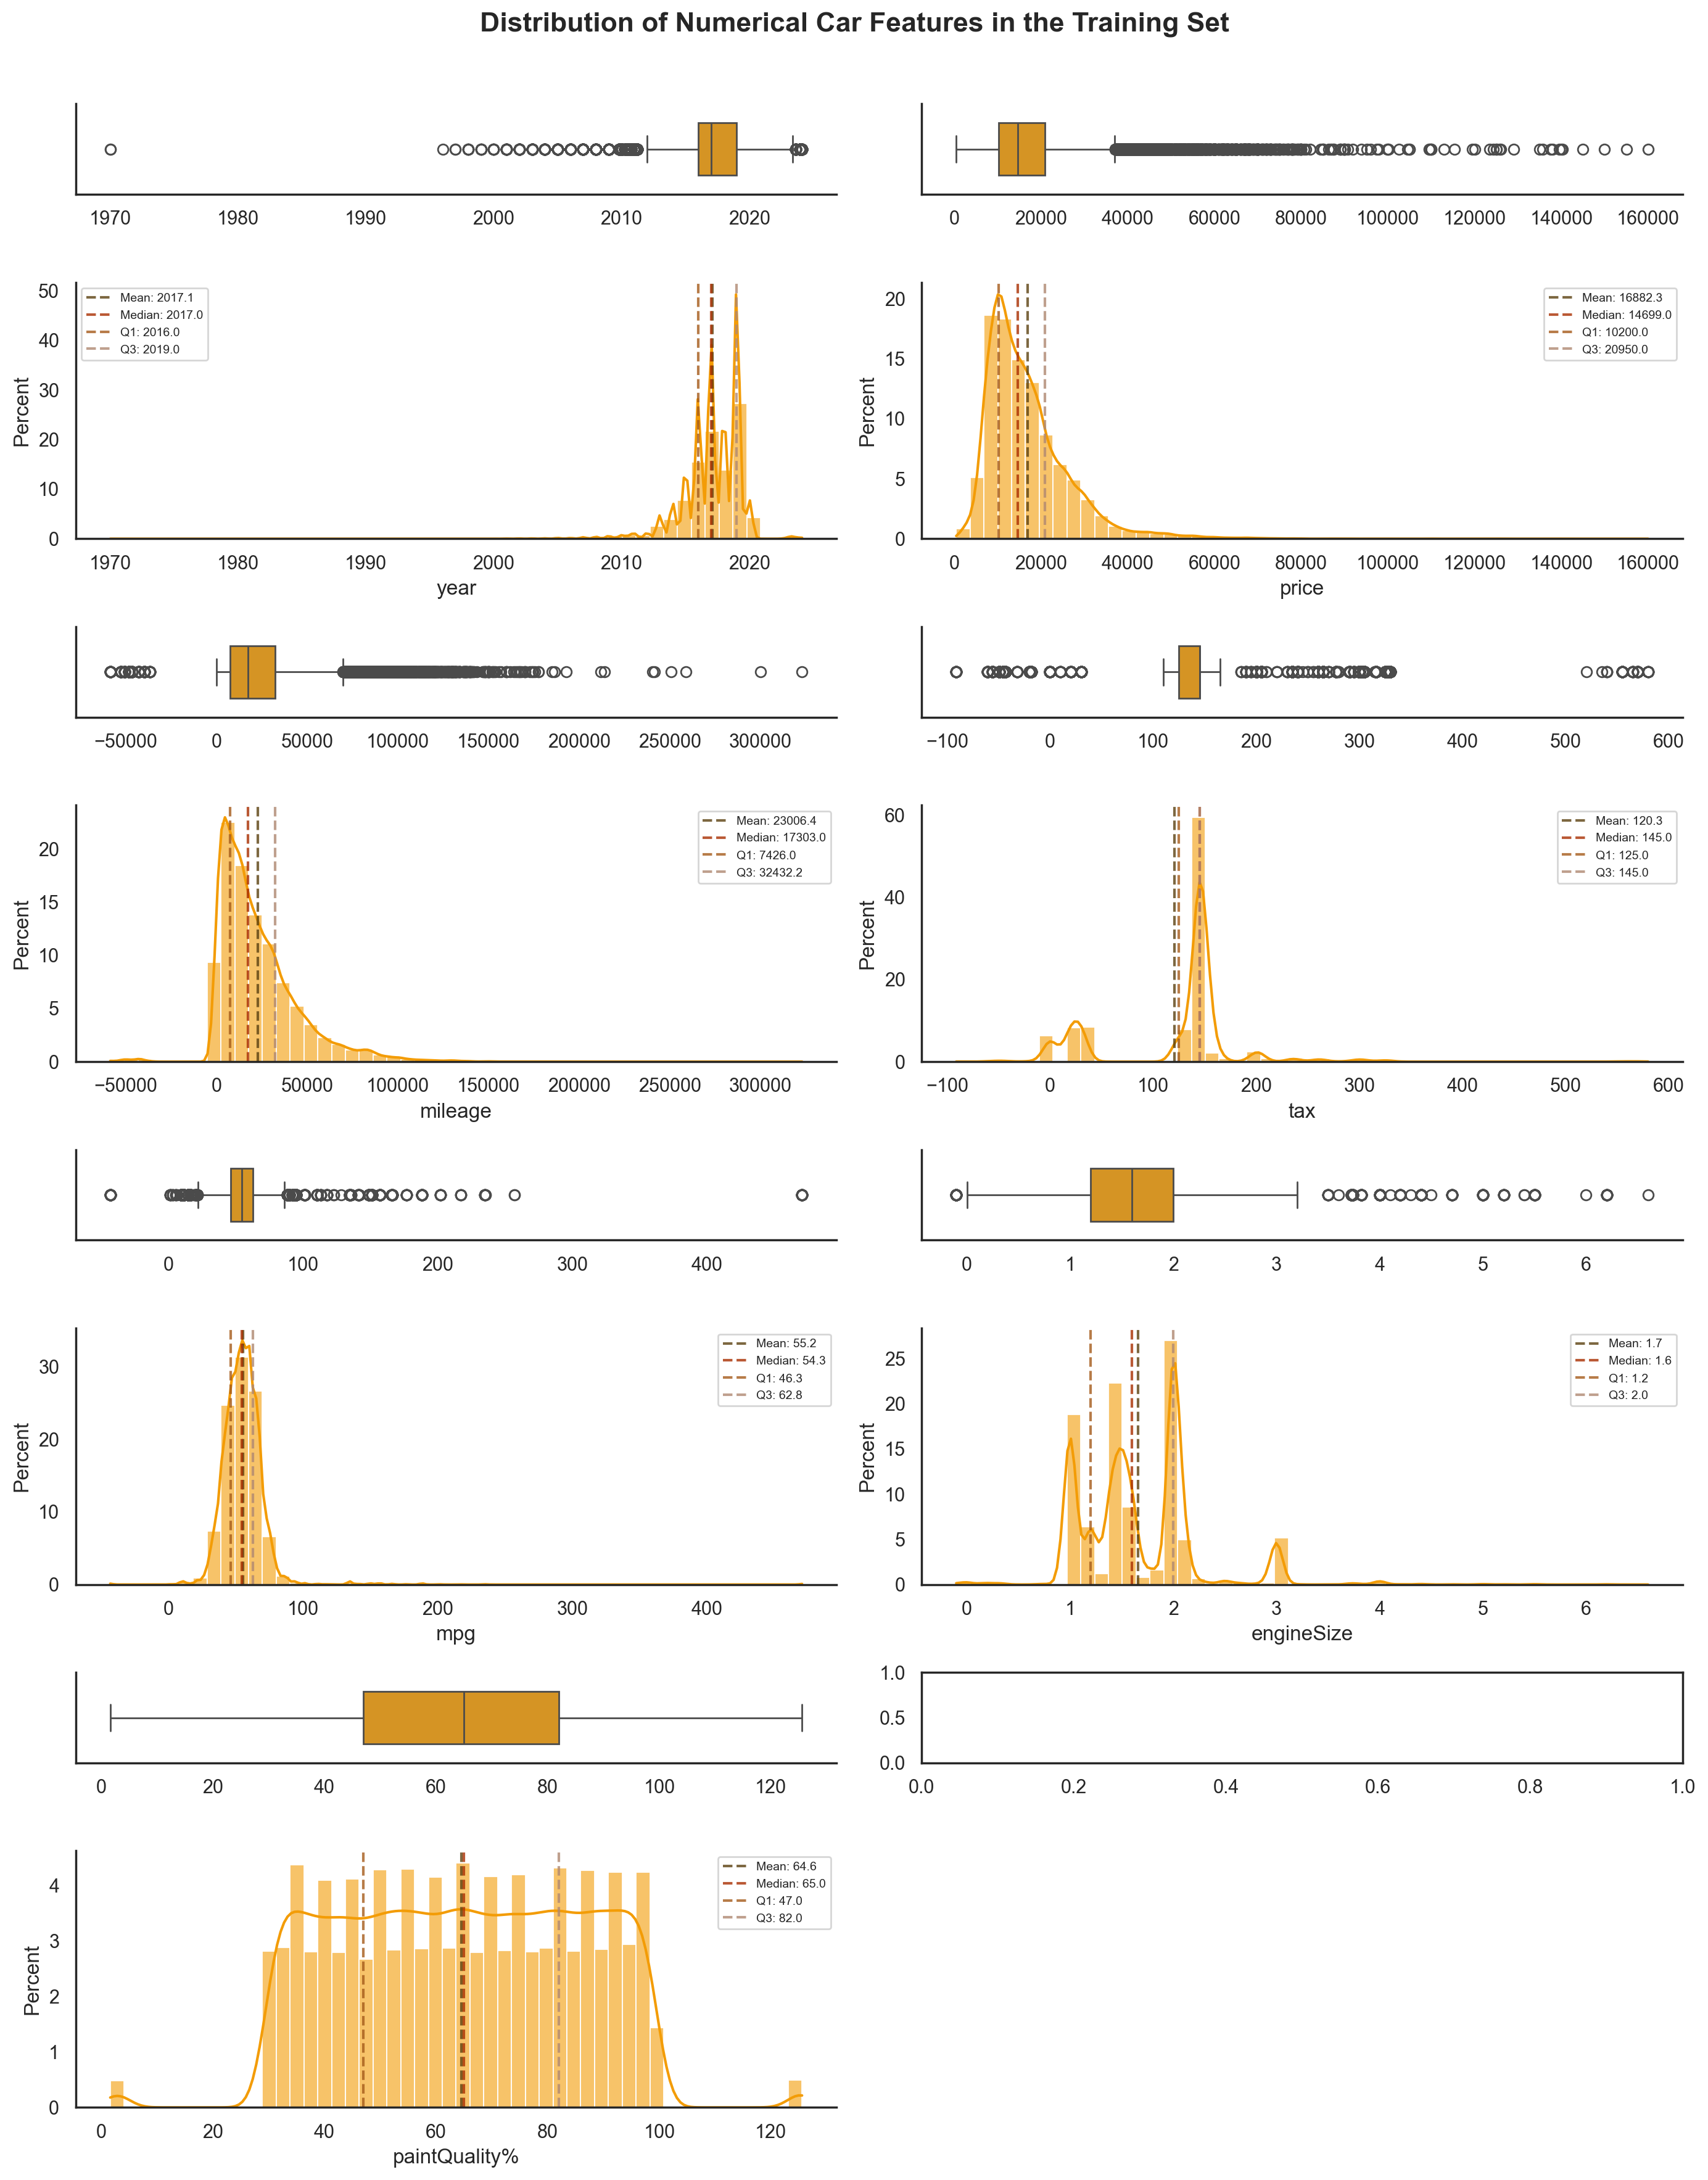

In [41]:
plot_box_hist(car_eval, num.drop('previousOwners'), "in the Training Set")

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- **`Year`**: The distribution for year is left-skewed, characterized by a long tail towards older models, with the vast majority of vehicles clustered in the 2010-2020 range as noted previously. The outliers represent mainly the oldest vehicles, extending down towards 1970.

- **`Price`**: The price distribution exhibits a notable positive skew, with a large number of vehicles concentrated at lower price points and a long tail extending significantly towards very high prices, which pulls the mean above the median. The visible outliers are these high-priced vehicles stretching past 40,000.

- **`Mileage`**: As established, mileage shows a positive skew, concentrating most vehicles under 60,000 miles while having a long tail for higher mileages. Crucially, the outliers on the far left clearly show the presence of negative mileage values, confirming the existence of this error as noted before.

- **`Tax`**: The tax variable displays a bimodal distribution. We observe the presence of invalid negative outliers, as noted earlier, as well as several high-end outliers. This indicates that while the bulk of the data is clustered within specific ranges, the distribution still extends toward the extreme upper end.

- **`MPG`**: The Miles Per Gallon variable is characterized by a strong positive/right skew (mean > median),  with most of the data clustering in the lower-to-mid range MPG values and a long, thin tail extending towards higher MPG values, contributing to the presence of several right-side outliers. It also shows visible negative outliers, which are non-physical and will be addressed.

- **`EngineSize`**: The engineSize plot presents a multimodal distribution, clearly showing distinct groups, likely corresponding to common engine displacements (e.g., peaks near 1, 1.5, and 2 liters). This variable shows a positive skew with some outliers on the higher end, as well as a negative outlier that is not physically possible.

- **`PaintQuality%`**: The paintQuality% distribution is exceptionally stable and appears nearly uniform across the central range (approximately 30% to 90%). The shape measures being near zero (skew≈0 and kurtosis≈0) are visually evident in this flat distribution, and it does not show any outliers.
</div>


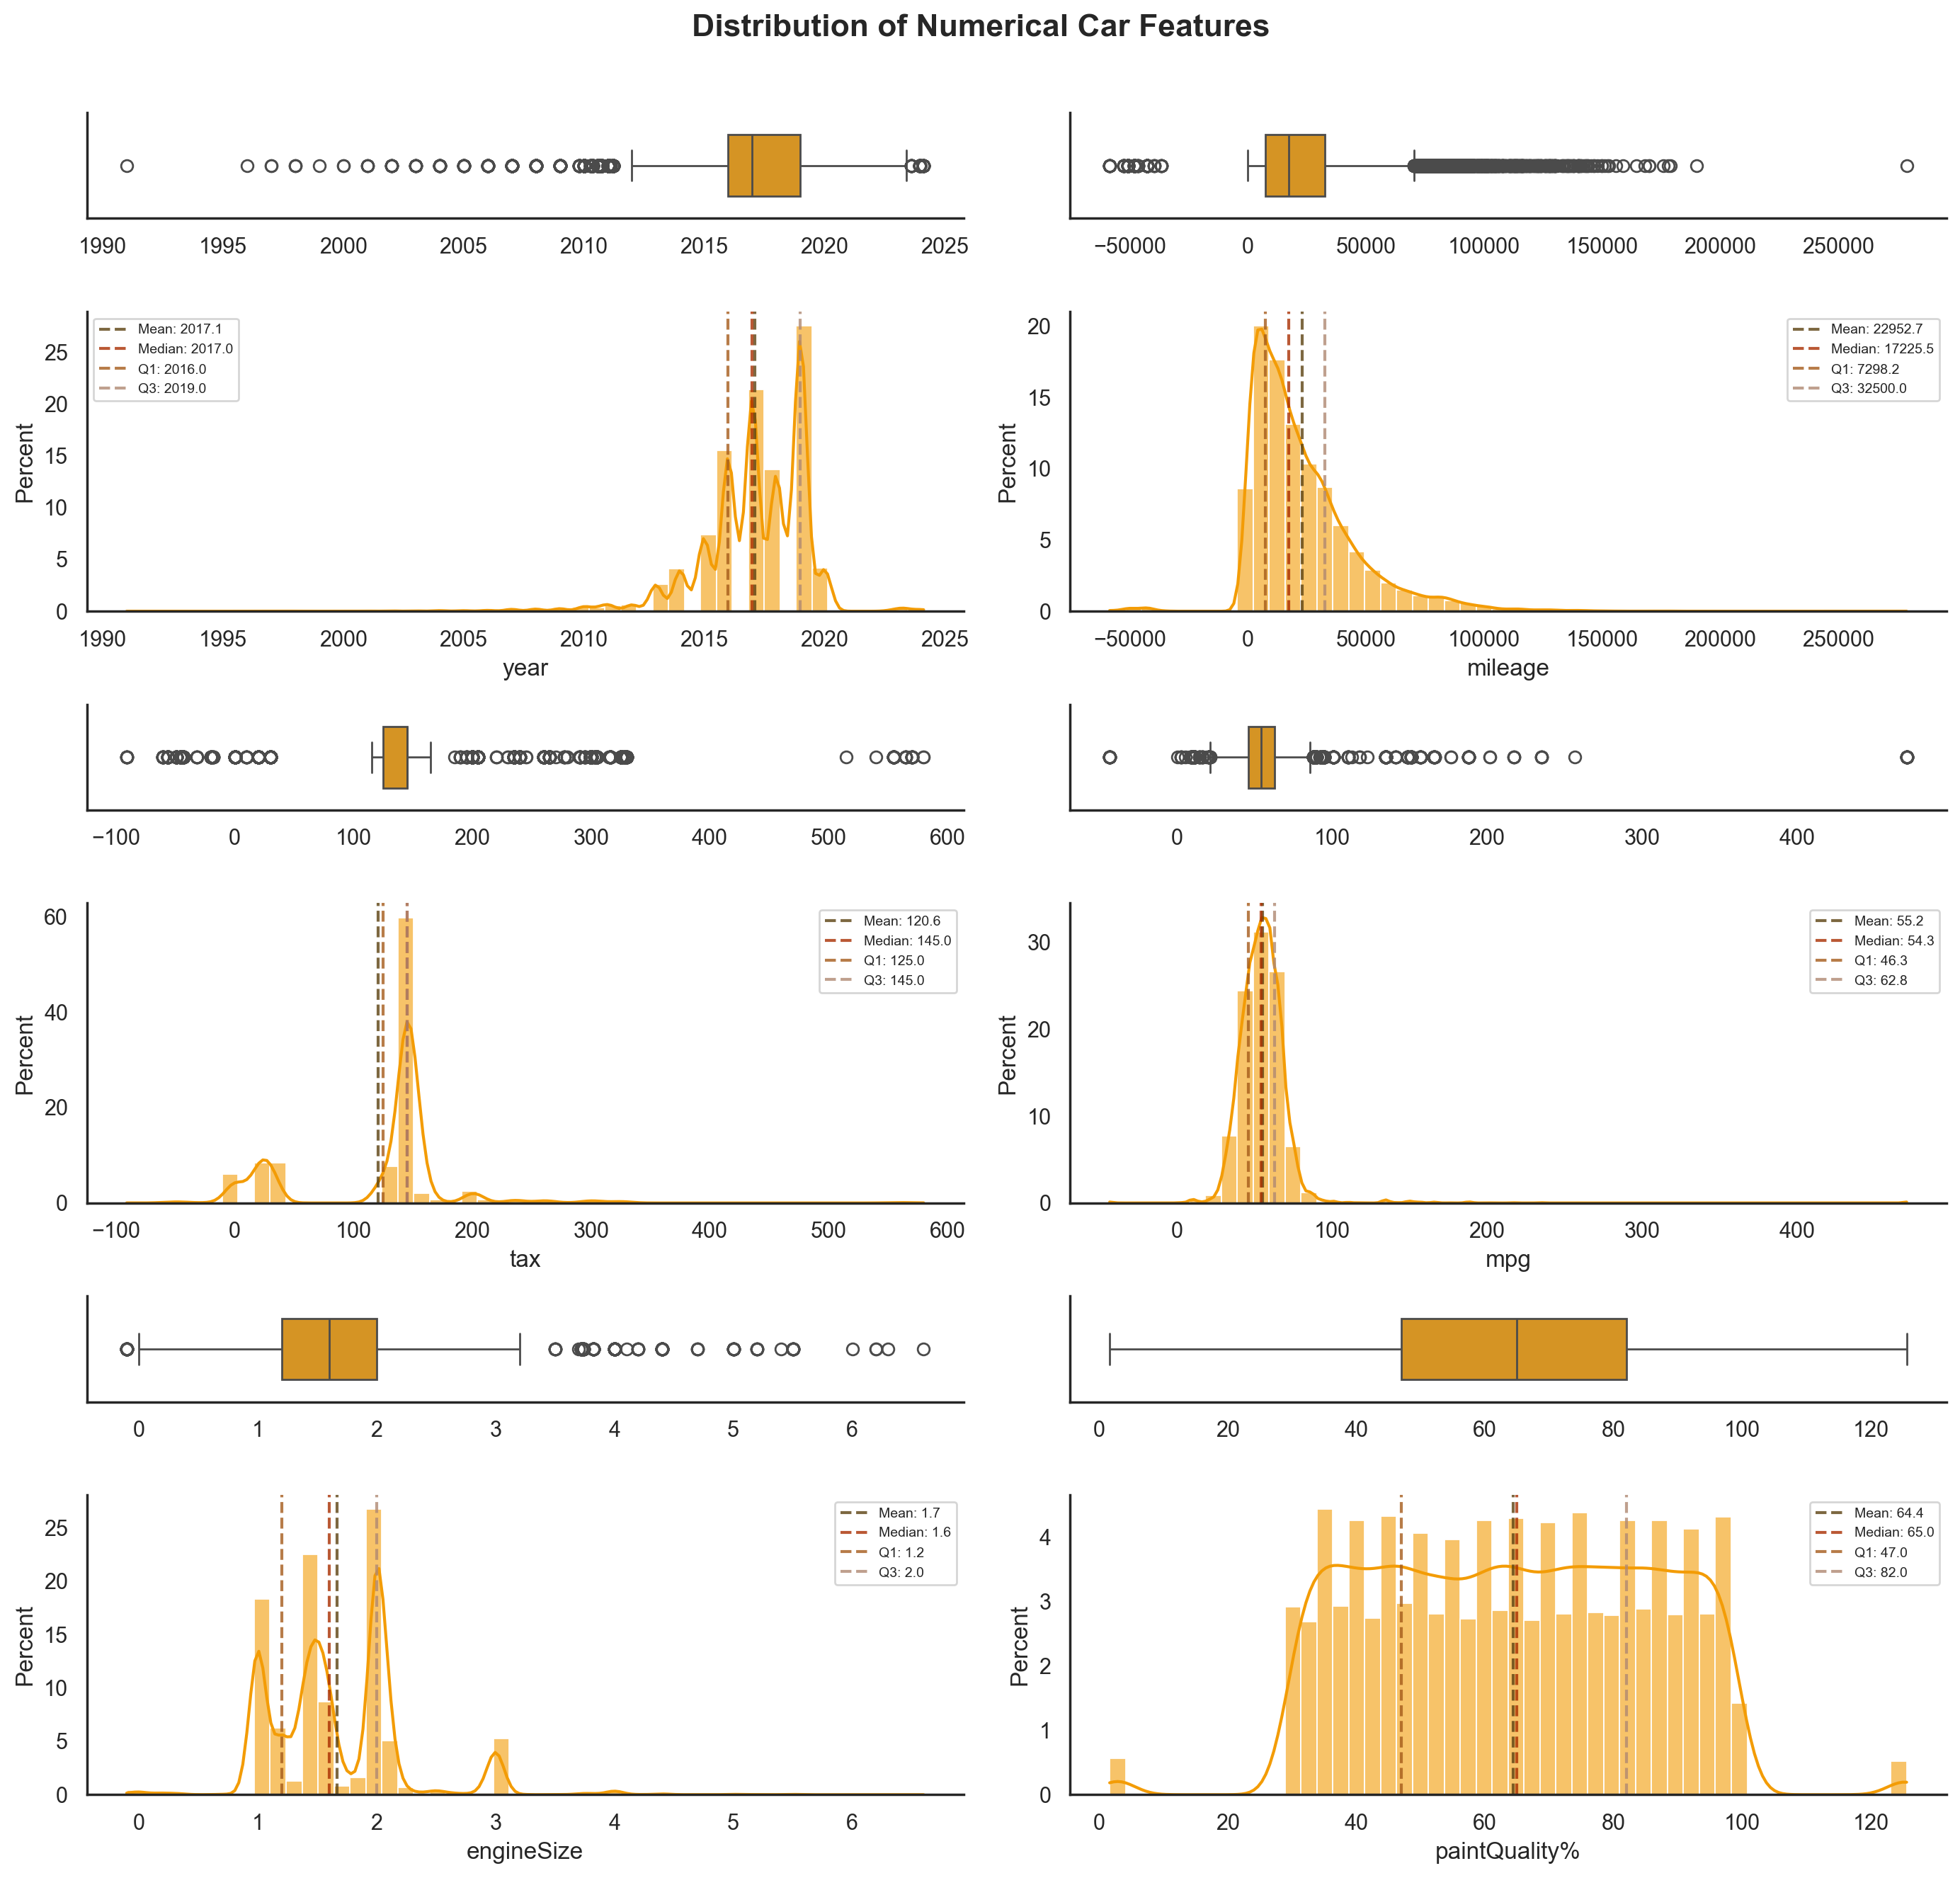

In [ ]:
plot_box_hist(X_test, num.drop(['previousOwners', 'price']), "in the Test Set")

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

VER ESTE TEXTO, A FUNÇÃO A SEGUIR E VER VAR A JUNTAR, DUPLICATES, JUNTAR TUDO DOS COLEGAS + 2 TEXTOS, COMEÇAR COM FEATURE SELECTION
</div>


In [ ]:
def plot_bar_wordcloud(df, cols, color='#644712', vars_per_row=1, figsize=(16,6)):
    """
    Plot barplots for all columns with optional wordclouds for categorical variables.
    If a column has more than 10 unique values, only the top 10 are shown in the barplot.
    
    Args:
        df (pd.DataFrame): Input dataframe
        cols (list or pd.Index): List of column names to plot
        color (str): Color of bars
        vars_per_row (int): Number of variables per row (default 1 = each variable per line)
        figsize (tuple): Size of each subplot
    """
    
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios':[1,1]})
        
        # --- Barplot ---
        ax = axes[0]
        
        value_counts = df[col].value_counts(normalize=True) * 100
        # Só os top 10 se houver mais que 10 únicos
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
        
        sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, color=color)
        
        # Adiciona percentagem acima de cada barra
        for i, v in enumerate(value_counts.values):
            ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=9)
        
        ax.set_title(f"{col} - Barplot", fontsize=12, fontweight='bold')
        ax.set_xlabel("Percentage")
        ax.set_ylabel(None)
        sns.despine(ax=ax, top=True, right=True)
        
        # --- WordCloud ---
        ax_wc = axes[1]
        
        if not pd.api.types.is_numeric_dtype(df[col]):  # apenas para categóricas
            word_counts = df[col].value_counts()
            wc = WordCloud(width=800, height=400,
                           background_color='white',
                           colormap='Blues_r',
                           contour_color='steelblue',
                           contour_width=1).generate_from_frequencies(word_counts)
            ax_wc.imshow(wc, interpolation='bilinear')
            ax_wc.axis('off')
            ax_wc.set_title(f"{col} - WordCloud", fontsize=12, fontweight='bold')
        else:
            ax_wc.axis('off')  # esconde o eixo se for numérica
        
        plt.tight_layout()
        plt.show()

In [ ]:
plot_bar_wordcloud(car_eval, cat.append(pd.Index(['previousOwners'])), color='#644712', vars_per_row=1)

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">


In [ ]:
plot_bar_wordcloud(X_test, cat.append(pd.Index(['previousOwners'])), color='#644712', vars_per_row=1)

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">


In [ ]:
# Pairwise Relationship of Numerical Variables
plt.figure(figsize=(13, 12))
sns.pairplot(car_eval[num], diag_kind='hist')
plt.suptitle('Pairwise Relationship of Numerical Variables', fontweight='bold', fontsize=16, y=1.02)
plt.show()

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

</div>

In [ ]:
X = car_eval.drop(columns=['price'])
y = car_eval[['price']]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 0)

It is essential to split the data into train and validation sets before performing steps such as missing value imputation or scaling, since the model should learn only from the training data. Otherwise, we would be introducing data leakage, which makes the model appear better than it actually is.

In [ ]:
# Check for missing values in the training, validation and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean()*100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean()*100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean()*100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

In [ ]:
# ###APAGAR###
# # # Para cada variável, printar os carID que têm missing e entre parêntesis a contagem cumulativa de vezes que esse carID já apareceu como missing

# from collections import Counter
# # Counter to keep track of how many times each carID appears with missing values
# missing_counter = Counter()

# # Iterate over each column
# for col in X_train.columns:
#     # Find rows where the column has missing values
#     missing_mask = X_train[col].isna()
    
#     # Get the carIDs from the index where missing
#     missing_ids = X_train.index[missing_mask].tolist()
    
#     if not missing_ids:
#         print(f'{col}: no missing values')
#         continue
    
#     # For each carID with missing, increment counter and prepare the print
#     prints = []
#     for cid in missing_ids:
#         missing_counter[cid] += 1
#         prints.append(f'{cid} ({missing_counter[cid]})')
    
#     # Print column name followed by carIDs with cumulative missing counts
#     print(f'{col}: ' + ', '.join(prints))

## <span style="color: #ffffff;">2.4 |  Inconsistency Checks</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.4 | Inconsistency Checks</b></span>
    </h1>
</div>

In [ ]:
# Get unique counts for each column
unique_counts = car_eval.nunique()

# Filter columns with less than 100 unique values
filtered_col = [col for col in unique_counts.index if unique_counts[col] < 100]

# Display unique values for filtered columns
print("\033[1mUnique values for each column:\033[0m")
for col in filtered_col:
    print(f"{col} ({unique_counts[col]}): {car_eval[col].unique()}\n")


<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

We were already aware of some inconsistencies, but here we can get a clearer picture of them. In the next section, we will address the inconsistencies found in the training set and take the opportunity to create general consistency rules that can also be applied to the test set.
</div>

### <span style="color: #ffffff;">2.4.1 |  Brand</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.1 |  Brand</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.4.2 |  model</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.2 |  model</b></span>
    </h1>
</div>

### <span style="color: #ffffff;">2.4.3 |  year</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.3 |  year</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `year` variable, we know that the year must be a positive integer, so we will truncate the decimal values and take their absolute value. We also know that cars cannot have a year later than the current year. Additionally, we will consider that a car cannot be older than [30](https://www.fbhvc.co.uk/news/article/eu-parliament-re-defines-historic-vehicles?.com) years to be sold on this platform. Any values outside this range will be considered errors and will be rounded to the nearest limit. Although in this dataset no cars are older than 30 years, including this rule improves the generalization and robustness of the preprocessing for future datasets that may contain such cases.


**<span style="color:red">PROCURAR UMA FONTE MELHOR.</span>**


In [ ]:
# 'year' has to be a positive integer and between 30 years ago and now

# Convert 'year' to integer and take absolute value; if NaN, keep as NaN
X_train["year"] = X_train["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)


current_year = datetime.now().year
# correct values outside the range [current_year-30, current_year] to the closest limit
X_train.loc[(X_train["year"] < current_year-30), "year"] = current_year-30
X_train.loc[(X_train["year"] > current_year), "year"] = current_year


# do exactly the same for the validation and test set
X_val["year"] = X_val["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_val.loc[(X_val["year"] < current_year-30), "year"] = current_year-30
X_val.loc[(X_val["year"] > current_year), "year"] = current_year

X_test["year"] = X_test["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_test.loc[(X_test["year"] < current_year-30), "year"] = current_year-30
X_test.loc[(X_test["year"] > current_year), "year"] = current_year

In [ ]:
print("Unique years in training set:", X_train['year'].unique())
print("Unique years in validation set:", X_val['year'].unique())
print("Unique years in test set:", X_test['year'].unique())

### <span style="color: #ffffff;">2.4.4 |  transmission</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.4 |  transmission</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `transmission` variable, by combining domain knowledge with the unique values observed in the dataset, we identified the possible valid transmission types as *manual*, *automatic*, *semi-auto*, *unknown* (which we consider as missing), and *other*. To correct typographical and formatting errors, we created a generic function called `correct`, which normalizes values (lowercasing and trimming spaces) and uses fuzzy matching to map each entry to the closest valid category. Missing values are kept as they are and will be handled later. This function can also be applied to other variables that exhibit similar inconsistencies.

In [ ]:
def correct(value, valid_values):
    # If the value is missing, return it as is; without this, it would convert into a string in the next step 
    if pd.isnull(value):
        return value

    # Normalize the value: lowercase + strip spaces
    normalized_value = str(value).strip().lower()

    # Find the closest valid value among the known transmission types
    match, score, _ = process.extractOne(normalized_value, valid_values)

    # Consider the match valid only if the similarity score is high (>80)
    return match if score > 80 else normalized_value

In [ ]:
transmission_uniques = ['manual', 'automatic', 'semi-auto', 'unknown', 'other']

# Apply the correction function to the 'transmission' column
X_train['transmission'] = X_train['transmission'].apply(lambda x: correct(x, transmission_uniques))
X_val['transmission'] = X_val['transmission'].apply(lambda x: correct(x, transmission_uniques))
X_test['transmission'] = X_test['transmission'].apply(lambda x: correct(x, transmission_uniques))

In [ ]:
print("Unique transmission types in training set:", X_train['transmission'].unique())
print("Unique transmission types in validation set:", X_val['transmission'].unique())
print("Unique transmission types in test set:", X_test['transmission'].unique())

In [ ]:
# We consider that 'unknown' is the same as missing
X_train['transmission'] = X_train['transmission'].replace('unknown', np.nan)
X_val['transmission'] = X_val['transmission'].replace('unknown', np.nan)
X_test['transmission'] = X_test['transmission'].replace('unknown', np.nan)

In [ ]:
# ###APAGAR###
# car_eval['transmission'] = car_eval['transmission'].apply(correct_transmission)

# mean_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].mean()
# median_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].median()
# std_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].std()

# mean_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].mean()
# median_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].median()
# std_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].std()

# print("Stats for 'unknown' transmission:")
# print("Mean:", mean_unknown, "Median:", median_unknown, "Std:", std_unknown)
# print("Stats for known transmissions:")
# print("Mean:", mean_known, "Median:", median_known, "Std:", std_known)


#--------------------------------------------------------
# Stats for 'unknown' transmission:
# Mean: 16857.379076086956 Median: 14688.0 Std: 9418.2313820754
# Stats for known transmissions:
# Mean: 16882.129324667385 Median: 14699.0 Std: 9740.05268596625

In [ ]:
# ###APAGAR###
# mean_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].mean()
# median_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].median()
# std_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].std()

# mean_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].mean()
# median_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].median()
# std_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].std()

# print("Stats for 'NaN' transmission:")
# print("Mean:", mean_nan, "Median:", median_nan, "Std:", std_nan)
# print("Stats for known transmissions:")
# print("Mean:", mean_not_nan, "Median:", median_not_nan, "Std:", std_not_nan)



#--------------------------------------------------------
# Stats for 'NaN' transmission:
# Mean: 16864.080157687255 Median: 14669.5 Std: 9465.81339565881
# Stats for known transmissions:
# Mean: 16882.253629904233 Median: 14699.0 Std: 9742.451484229981

### <span style="color: #ffffff;">2.4.5 |  mileage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.5 |  mileage</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou exageradamente altos.

# Consistência com year (um carro muito novo não pode ter 300.000 milhas).

### <span style="color: #ffffff;">2.4.6 |  fuelType</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.6 |  fuelType</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `fuelType` variable, by combining domain knowledge with the unique values observed in the dataset, we identified the possible valid fuel types as *petrol*, *diesel*, *hybrid*, *electric*, and *other*. To correct typographical and formatting errors, we applied the previously created `correct` function.
</div>


In [ ]:
fueltype_uniques = ['petrol', 'diesel', 'hybrid', 'electric', 'other']

# Apply the correction function to the 'fuelType' column
X_train['fuelType'] = X_train['fuelType'].apply(lambda x: correct(x, fueltype_uniques))
X_val['fuelType'] = X_val['fuelType'].apply(lambda x: correct(x, fueltype_uniques))
X_test['fuelType'] = X_test['fuelType'].apply(lambda x: correct(x, fueltype_uniques))

In [ ]:
print("Unique fuel types in training set:", X_train['fuelType'].unique())
print("Unique fuel types in validation set:", X_val['fuelType'].unique())
print("Unique fuel types in test set:", X_test['fuelType'].unique())

In [ ]:
# Combinações inconsistentes com engineSize ou mpg (por exemplo, um carro elétrico não deve ter mpg ou motor a combustão).

### <span style="color: #ffffff;">2.4.7 |  tax</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.7 |  tax</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou extremamente altos.

### <span style="color: #ffffff;">2.4.8 |  mpg</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.8 |  mpg</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou extremamente altos.

# Inconsistência com fuelType (um híbrido/eléctrico sem consumo de gasolina/diesel).

### <span style="color: #ffffff;">2.4.9 |  engineSize</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.9 |  engineSize</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou zeros.

# Inconsistência com fuelType (por ex., um motor elétrico não tem litros)

### <span style="color: #ffffff;">2.4.10 |  paintQuality%</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.10 |  paintQuality%</b></span>
    </h1>
</div>

In [ ]:
# Valores fora do intervalo 0–100.

# Valores ausentes ou não numéricos.

### <span style="color: #ffffff;">2.4.11 |  previousOwners</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.11 |  previousOwners</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou irrealisticamente altos. QUAL CORR COM YEARS E MILEAGE

### <span style="color: #ffffff;">2.4.12 |  hasDamage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.12 |  hasDamage</b></span>
    </h1>
</div>

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px;">
</div>

In [ ]:
#Check for duplicates in the training, validation, and test sets
print(car_eval.duplicated().sum())
print(X_test.duplicated().sum())
print(X_train.duplicated().sum())
print(X_val.duplicated().sum())

In [ ]:
X_train.info()

In [ ]:
# #Check for duplicates
# print(f"Total duplicates: {car_eval.duplicated().sum()}")
# #Check for duplicates without the carID column
# print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
# #Check for duplicates without the price column
# print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

# # Repeat for the test set
# print(f"Total duplicates in test set: {X_test.duplicated().sum()}")
# print(f"Duplicates without carID in test set: {X_test.drop(columns=['carID']).duplicated().sum()}")


#ACABAR O CÓDIGO
#SE NESTA FASE NÃO FIZERMOS NENHUM IMPUTAÇÃO ENTÃO NA VERDADE PODEMOS AGUARDAR O SPLIT ATÉ À PARTE DE PREENCHER OS MISSING E AQUI VEMOS CAR_EVAL DUPLICATES E TEST TAMBÉM


## <span style="color: #ffffff;">2.3 | Explore Data Visualizations (Continued)</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations (Continued)</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.5 |  Missing Data</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.5 | Missing Data</b></span>
    </h1>
</div>

In [ ]:
##########################################QUANTOS MISSINGS POR LINHA

In [ ]:
# Check for missing values in the training, validation, and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

In [ ]:
# fill missing values with median or mode
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']: # Numerical variables
        median = X_train[col].median()
        X_train[col].fillna(median, inplace=True)
        X_val[col].fillna(median, inplace=True)
        X_test[col].fillna(median, inplace=True)
    else:  # Categorical variables
        mode = X_train[col].mode()[0]
        X_train[col].fillna(mode, inplace=True)
        X_val[col].fillna(mode, inplace=True)
        X_test[col].fillna(mode, inplace=True)

In [ ]:
# Check for missing values in the training set
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

In [ ]:
# Get categorical columns
cat_cols = car_eval.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc = cat_cols.describe().T

# Add proportion of the most frequent category
cat_desc['top_freq_ratio'] = cat_desc['freq'] / cat_desc['count']

cat_desc

In [ ]:
# Get categorical columns
cat_cols_t = X_test.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc_t = cat_cols_t.describe().T

# Add proportion of the most frequent category
cat_desc_t['top_freq_ratio'] = cat_desc_t['freq'] / cat_desc_t['count']

cat_desc_t

## <span style="color: #ffffff;">2.3 | Explore Data Visualizations (Continued)</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations (Continued)</b></span>
    </h1>
</div>

In [ ]:
sns.violinplot(x='transmission', y='price', data=car_eval)

In [ ]:
sns.kdeplot(data=car_eval, x='mileage', hue='fuelType', fill=True)

In [ ]:
from joypy import joyplot
joyplot(data=car_eval, by='fuelType', column='price')

In [ ]:
#Network diagrams / Graphs com NetworkX

## <span style="color: #ffffff;">2.6 |  Outliers</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.6 | Outliers</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.7 |  Categorical Variables</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.7 | Categorical Variables</b></span>
    </h1>
</div>

In [ ]:
# Categorical variables
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
categorical_cols

In [ ]:
# Make copies of the datasets
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Fit the encoder on the categorical columns (train + val + test)
ohe.fit(pd.concat([X_train_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_val_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_test_enc[['Brand', 'model', 'transmission', 'fuelType']]], axis=0))

# Helper function to transform and join to the dataset
def apply_ohe(df, encoder):
    transformed = encoder.transform(df[['Brand', 'model', 'transmission', 'fuelType']])
    transformed_df = pd.DataFrame(transformed, 
                                  columns=encoder.get_feature_names_out(['Brand', 'model', 'transmission', 'fuelType']),
                                  index=df.index)
    df = pd.concat([df.drop(columns=['Brand', 'model', 'transmission', 'fuelType']), transformed_df], axis=1)
    return df

# Apply to train, val and test
X_train_enc = apply_ohe(X_train_enc, ohe)
X_val_enc = apply_ohe(X_val_enc, ohe)
X_test_enc = apply_ohe(X_test_enc, ohe)

## <span style="color: #ffffff;">2.8 |  Review Current Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.8 | Review Current Features</b></span>
    </h1>
</div>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Pôr simples gráficos e comparar o antes (guardar foto) e depois de grande parte do pre-processing
</div>


## <span style="color: #ffffff;">2.9 | Create Extra Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.9 | Create Extra Features</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.10 | Data Scaling</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.10 | Data Scaling</b></span>
    </h1>
</div>

In [ ]:
# Apply MinMaxScaler to the training, validation and test data 
scaler = StandardScaler()
X_train_enc = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns, index=X_train_enc.index)
X_val_enc = pd.DataFrame(scaler.transform(X_val_enc), columns=X_val_enc.columns, index=X_val_enc.index)
X_test_enc = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns, index=X_test_enc.index)

## <span style="color: #ffffff;">2.11 | Feature Selection</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Optimization efforts: presentation, results and discussion
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_enc, y_train) 
    
    # Predict on validation set
    y_pred = model.predict(X_val_enc)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
    
    # Print results
    print(f"{model_name} MAE: {mae:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} R²: {r2:.4f}")
    print("-" * 50)

# Print summary of all models
print("\nModel Evaluation Results Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

In [ ]:
# Sem criar nem tirar variáveis (sem feature selection), usando OHE, sem tratar inconsistências, sem tratar outliers, sem fazer hyperparameter tuning
# tratando missing values com média, usando StandardScaler
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.7321, RMSE = 4177.1965, R² = 0.8204
# Ridge: MAE = 2553.7875, RMSE = 4175.5577, R² = 0.8206
# Lasso: MAE = 2551.7477, RMSE = 4173.1808, R² = 0.8208
# RandomForest: MAE = 1482.2024, RMSE = 2499.0898, R² = 0.9357
# GradientBoosting: MAE = 2321.1029, RMSE = 3500.0157, R² = 0.8739
# DecisionTree: MAE = 1941.1537, RMSE = 3275.1219, R² = 0.8896
# KNeighbors: MAE = 2384.9863, RMSE = 4107.6665, R² = 0.8264


#--------------------------------------------------
# + tirar hasDamage e ver inconsistências em year
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
# Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
# Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
# RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
# GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
# DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834
# KNeighbors: MAE = 2384.8373, RMSE = 4107.8976, R² = 0.8263
#não houve grandes alterações, em alguns modelos melhorou, noutros piorou


# --------------------------------------------------
# tratando das inconsistências das minhas variáveis + ter hasdamage
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2549.0179, RMSE = 4170.6681, R² = 0.8210
# Ridge: MAE = 2548.0386, RMSE = 4169.0990, R² = 0.8211
# Lasso: MAE = 2546.5207, RMSE = 4167.1186, R² = 0.8213
# RandomForest: MAE = 1466.3328, RMSE = 2485.5036, R² = 0.9364
# GradientBoosting: MAE = 2307.7618, RMSE = 3451.5030, R² = 0.8774
# DecisionTree: MAE = 1942.4345, RMSE = 3364.6791, R² = 0.8835
# KNeighbors: MAE = 2106.1056, RMSE = 3683.4455, R² = 0.8604
# melhorou até bastante



<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
Para muitas destas variáveis era precisa scaling da target

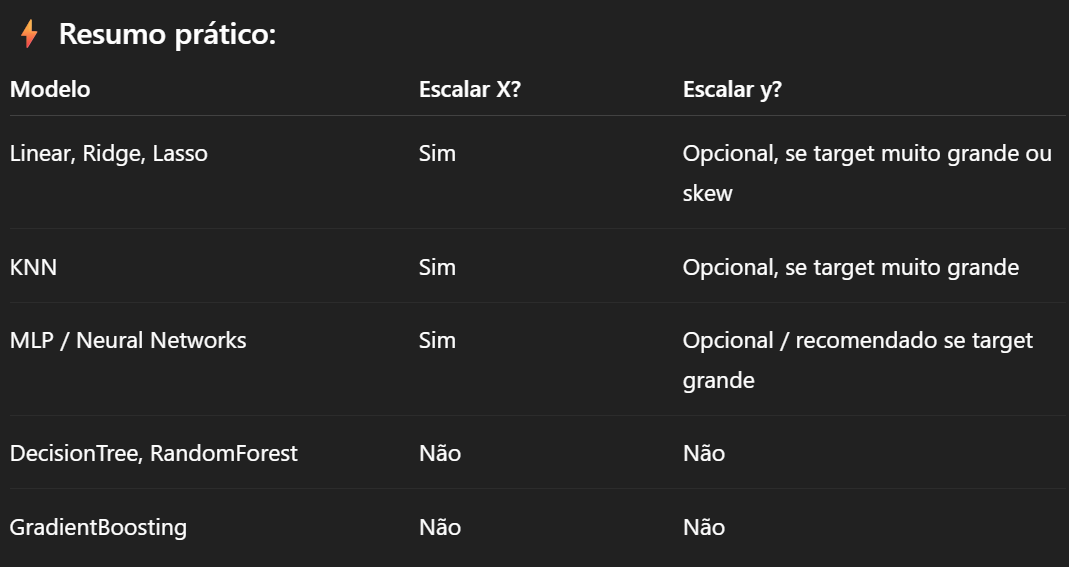

</div>
